In [23]:
# ARTIFICIAL NEURAL NETWORK 

# DATA PREPROCESSING 

# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
# importing dataset 
df = pd.read_csv("C:/Users/ramak/OneDrive/Desktop/deep learning models/ANN/CUSTOMER CHURN/Churn_Modelling (1).csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
#assigning x and y
x = df.iloc[:,3:13]
y = df.iloc[:,13]
print(x,y)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [26]:
# create dummy variables

# Apply LabelEncoder to specific columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns_to_encode = ['Geography','Gender']
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

print(df)


      RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602   Hargrave          619          0       0   42   
1             2    15647311       Hill          608          2       0   41   
2             3    15619304       Onio          502          0       0   42   
3             4    15701354       Boni          699          0       0   39   
4             5    15737888   Mitchell          850          2       0   43   
...         ...         ...        ...          ...        ...     ...  ...   
9995       9996    15606229   Obijiaku          771          0       1   39   
9996       9997    15569892  Johnstone          516          0       1   35   
9997       9998    15584532        Liu          709          0       0   36   
9998       9999    15682355  Sabbatini          772          1       1   42   
9999      10000    15628319     Walker          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  

In [27]:
#assigning x and y
x = df.iloc[:,3:13]
y = df.iloc[:,13]
print(x,y)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [28]:
# splitting dataset into train data and test data 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
print(x_train,x_test,y_train,y_test)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7389          667          2       0   34       5       0.00              2   
9275          427          1       1   42       1   75681.52              1   
2995          535          0       0   29       2  112367.34              1   
5316          654          2       1   40       5  105683.63              1   
356           850          2       0   57       8  126776.30              2   
...           ...        ...     ...  ...     ...        ...            ...   
9225          594          1       0   32       4  120074.97              2   
4859          794          2       0   22       4  114440.24              1   
3264          738          0       1   35       5  161274.05              2   
9845          590          2       0   38       9       0.00              2   
2732          623          1       0   48       1  108076.33              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [30]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)



In [31]:
# lets make ann
# importing keras libraries and packages 
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [32]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [33]:
import sys
print(sys.executable)


C:\ProgramData\anaconda3\python.exe


In [34]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout 

In [35]:


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=10))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)




Epoch 1/100


C:\Users\ramak\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8018 - loss: 0.5173 - val_accuracy: 0.7955 - val_loss: 0.5276
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7964 - loss: 0.5017 - val_accuracy: 0.7955 - val_loss: 0.5121
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7953 - loss: 0.4946 - val_accuracy: 0.7955 - val_loss: 0.5003
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7904 - loss: 0.4882 - val_accuracy: 0.7955 - val_loss: 0.4912
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7930 - loss: 0.4749 - val_accuracy: 0.7955 - val_loss: 0.4841
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7934 - loss: 0.4675 - val_accuracy: 0.7955 - val_loss: 0.4777
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7951 - loss: 0.4629 - val_accuracy: 0.7959 - val_loss: 0.4720
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7818 - loss: 0.4691 - val_accuracy: 0.7959

In [36]:
# List all data in history
print(model_history.history)

{'accuracy': [0.7962306141853333, 0.7962306141853333, 0.7962306141853333, 0.7962306141853333, 0.7962306141853333, 0.7962306141853333, 0.796417236328125, 0.7971636652946472, 0.7969770431518555, 0.7988430857658386, 0.7999626994132996, 0.8033215403556824, 0.8050009608268738, 0.8042545318603516, 0.8053741455078125, 0.8072401285171509, 0.8070535659790039, 0.8074267506599426, 0.8087329864501953, 0.8087329864501953, 0.809106171131134, 0.8100391626358032, 0.8119052052497864, 0.8141444325447083, 0.8147042393684387, 0.8182497024536133, 0.8182497024536133, 0.8191826939582825, 0.8201156854629517, 0.8236611485481262, 0.8236611485481262, 0.8251539468765259, 0.8259003758430481, 0.8268333673477173, 0.8283261656761169, 0.827206552028656, 0.82813960313797, 0.8296324014663696, 0.8290725946426392, 0.8296324014663696, 0.8298190236091614, 0.8290725946426392, 0.8286994099617004, 0.8296324014663696, 0.8290725946426392, 0.8288859724998474, 0.8300055861473083, 0.831311821937561, 0.8322448134422302, 0.8324314355

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


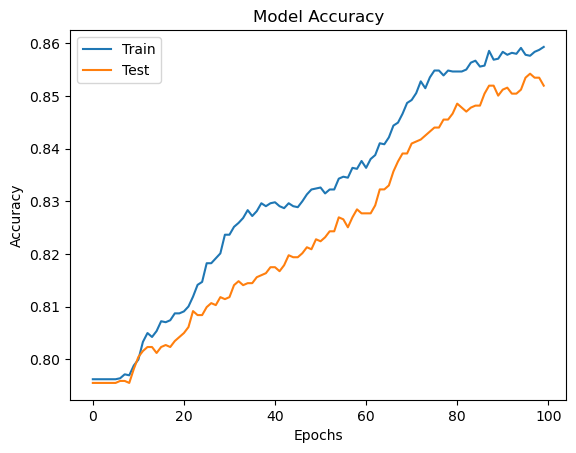

In [37]:
 #Print the training and validation loss and accuracy for each epoch
print(model_history.history.keys())  # This will show you the available keys

# Example: Plotting the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1520,   75],
       [ 214,  191]], dtype=int64)

In [40]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [41]:
print(score)

0.8555


In [43]:
# Save the trained model to a pickle file
import pickle
with open('modelann churn.pkl', 'wb') as file:
    pickle.dump(classifier, file)

print("Model saved to 'model.pkl'")


Model saved to 'model.pkl'
